In [31]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_linnerud
import numpy as np

In [32]:
linnerud_data = load_linnerud()

In [33]:
linnerud_data['DESCR']

'.. _linnerrud_dataset:\n\nLinnerrud dataset\n-----------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20\n    :Number of Attributes: 3\n    :Missing Attribute Values: None\n\nThe Linnerud dataset is a multi-output regression dataset. It consists of three\nexercise (data) and three physiological (target) variables collected from\ntwenty middle-aged men in a fitness club:\n\n- *physiological* - CSV containing 20 observations on 3 physiological variables:\n   Weight, Waist and Pulse.\n- *exercise* - CSV containing 20 observations on 3 exercise variables:\n   Chins, Situps and Jumps.\n\n.. topic:: References\n\n  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:\n    Editions Technic.\n'

In [34]:

linnerud_data['feature_names']

['Chins', 'Situps', 'Jumps']

In [35]:
linnerud_data['target_names']

['Weight', 'Waist', 'Pulse']

In [36]:
D = linnerud_data['data']

In [37]:
D.shape

(20, 3)

In [38]:
D

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [39]:
import numpy as np
np.cov(D.T, ddof=1)

array([[  27.94473684,  230.10789474,  134.38421053],
       [ 230.10789474, 3914.57631579, 2146.98421053],
       [ 134.38421053, 2146.98421053, 2629.37894737]])

In [40]:
var_thresh = 100
sel = VarianceThreshold(threshold=var_thresh)
sel.fit_transform(D)

array([[162.,  60.],
       [110.,  60.],
       [101., 101.],
       [105.,  37.],
       [155.,  58.],
       [101.,  42.],
       [101.,  38.],
       [125.,  40.],
       [200.,  40.],
       [251., 250.],
       [120.,  38.],
       [210., 115.],
       [215., 105.],
       [ 50.,  50.],
       [ 70.,  31.],
       [210., 120.],
       [ 60.,  25.],
       [230.,  80.],
       [225.,  73.],
       [110.,  43.]])

In [41]:
from sklearn.preprocessing import MinMaxScaler
normalized_D = MinMaxScaler().fit_transform(D)
normalized_D

array([[0.25      , 0.55721393, 0.15555556],
       [0.0625    , 0.29850746, 0.15555556],
       [0.6875    , 0.25373134, 0.33777778],
       [0.6875    , 0.27363184, 0.05333333],
       [0.75      , 0.52238806, 0.14666667],
       [0.1875    , 0.25373134, 0.07555556],
       [0.4375    , 0.25373134, 0.05777778],
       [0.3125    , 0.37313433, 0.06666667],
       [0.875     , 0.74626866, 0.06666667],
       [1.        , 1.        , 1.        ],
       [1.        , 0.34825871, 0.05777778],
       [0.75      , 0.7960199 , 0.4       ],
       [0.8125    , 0.82089552, 0.35555556],
       [0.        , 0.        , 0.11111111],
       [0.3125    , 0.09950249, 0.02666667],
       [0.6875    , 0.7960199 , 0.42222222],
       [0.1875    , 0.04975124, 0.        ],
       [0.625     , 0.89552239, 0.24444444],
       [0.875     , 0.87064677, 0.21333333],
       [0.0625    , 0.29850746, 0.08      ]])

In [42]:
np.cov(normalized_D.T, ddof=1)

array([[0.10915913, 0.07155096, 0.03732895],
       [0.07155096, 0.09689306, 0.04747339],
       [0.03732895, 0.04747339, 0.05193835]])

In [149]:
var_thresh = 0.06
sel = VarianceThreshold(threshold=var_thresh)
sel.fit_transform(normalized_D)

array([[0.25      , 0.55721393],
       [0.0625    , 0.29850746],
       [0.6875    , 0.25373134],
       [0.6875    , 0.27363184],
       [0.75      , 0.52238806],
       [0.1875    , 0.25373134],
       [0.4375    , 0.25373134],
       [0.3125    , 0.37313433],
       [0.875     , 0.74626866],
       [1.        , 1.        ],
       [1.        , 0.34825871],
       [0.75      , 0.7960199 ],
       [0.8125    , 0.82089552],
       [0.        , 0.        ],
       [0.3125    , 0.09950249],
       [0.6875    , 0.7960199 ],
       [0.1875    , 0.04975124],
       [0.625     , 0.89552239],
       [0.875     , 0.87064677],
       [0.0625    , 0.29850746]])

In [43]:
from sklearn.datasets import load_iris
D_iris = load_iris()['data']

In [44]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

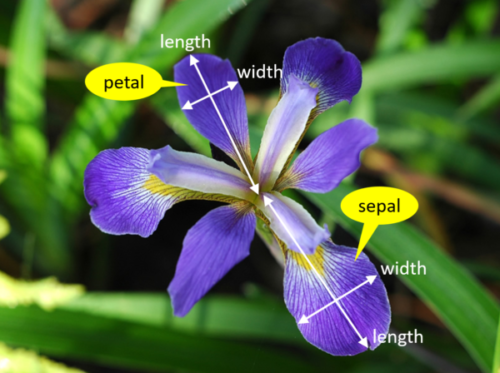

In [45]:
D_iris.shape

(150, 4)

In [47]:
np.cov(D_iris.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [48]:
np.cov(MinMaxScaler().fit_transform(D_iris).T)

array([[ 0.05290845, -0.00491134,  0.05999602,  0.05975355],
       [-0.00491134,  0.03298254, -0.02328082, -0.02111795],
       [ 0.05999602, -0.02328082,  0.08952249,  0.09149784],
       [ 0.05975355, -0.02111795,  0.09149784,  0.10086914]])

In [49]:
D = D_iris[:, 2:4]

Text(0.5, 1.0, 'Scatter plot of data matrix D')

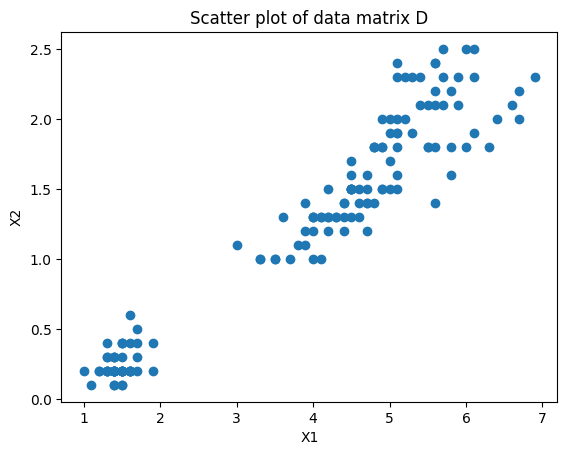

In [50]:
import matplotlib.pyplot as plt
plt.scatter(D[:,0], D[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of data matrix D')

In [51]:
D.shape

(150, 2)

In [52]:
multivariate_mean = np.mean(D, axis=0)

In [53]:
print(multivariate_mean)

[3.758      1.19933333]


In [54]:
centered_data = D - multivariate_mean

In [55]:
print(centered_data)

[[-2.35800000e+00 -9.99333333e-01]
 [-2.35800000e+00 -9.99333333e-01]
 [-2.45800000e+00 -9.99333333e-01]
 [-2.25800000e+00 -9.99333333e-01]
 [-2.35800000e+00 -9.99333333e-01]
 [-2.05800000e+00 -7.99333333e-01]
 [-2.35800000e+00 -8.99333333e-01]
 [-2.25800000e+00 -9.99333333e-01]
 [-2.35800000e+00 -9.99333333e-01]
 [-2.25800000e+00 -1.09933333e+00]
 [-2.25800000e+00 -9.99333333e-01]
 [-2.15800000e+00 -9.99333333e-01]
 [-2.35800000e+00 -1.09933333e+00]
 [-2.65800000e+00 -1.09933333e+00]
 [-2.55800000e+00 -9.99333333e-01]
 [-2.25800000e+00 -7.99333333e-01]
 [-2.45800000e+00 -7.99333333e-01]
 [-2.35800000e+00 -8.99333333e-01]
 [-2.05800000e+00 -8.99333333e-01]
 [-2.25800000e+00 -8.99333333e-01]
 [-2.05800000e+00 -9.99333333e-01]
 [-2.25800000e+00 -7.99333333e-01]
 [-2.75800000e+00 -9.99333333e-01]
 [-2.05800000e+00 -6.99333333e-01]
 [-1.85800000e+00 -9.99333333e-01]
 [-2.15800000e+00 -9.99333333e-01]
 [-2.15800000e+00 -7.99333333e-01]
 [-2.25800000e+00 -9.99333333e-01]
 [-2.35800000e+00 -9

In [56]:
np.mean(centered_data, axis=0)

array([-2.55203266e-15, -4.48530102e-16])

Text(0.5, 1.0, 'Scatter plot of centered and original data')

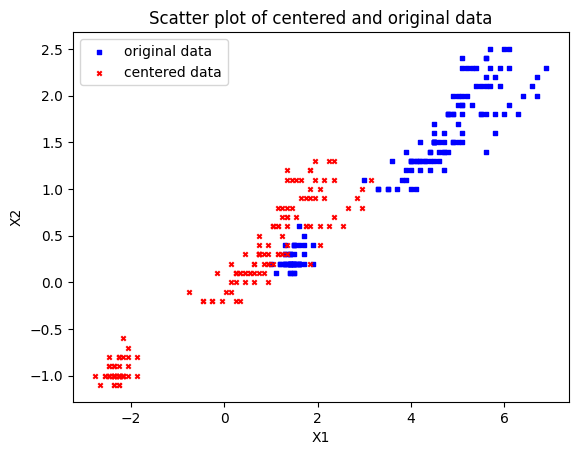

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(D[:,0], D[:,1], s=10, c='b', marker='s', label='original data')
ax.scatter(centered_data[:,0], centered_data[:,1], s=10, c='r', marker='x', label='centered data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.title('Scatter plot of centered and original data')

In [59]:
A = np.array([[2,1],[1,-1]])
print(A)

[[ 2  1]
 [ 1 -1]]


In [60]:
D[0,:]

array([1.4, 0.2])

In [61]:
A.dot(D[0,:])

array([3. , 1.2])

In [62]:
A.dot(D[1,:])

array([3. , 1.2])

In [102]:
D[1,:]

array([3. , 1.4])

In [103]:
D.T.shape

(2, 150)

In [63]:
linearly_transformed_data = A.dot(D.T)
print(linearly_transformed_data)

[[ 3.   3.   2.8  3.2  3.   3.8  3.1  3.2  3.   3.1  3.2  3.4  2.9  2.3
   2.6  3.4  3.   3.1  3.7  3.3  3.6  3.4  2.2  3.9  4.   3.4  3.6  3.2
   3.   3.4  3.4  3.4  3.1  3.   3.2  2.6  2.8  2.9  2.8  3.2  2.9  2.9
   2.8  3.8  4.2  3.1  3.4  3.   3.2  3.  10.8 10.5 11.3  9.3 10.7 10.3
  11.   7.6 10.5  9.2  8.   9.9  9.  10.8  8.5 10.2 10.5  9.2 10.5  8.9
  11.4  9.3 11.3 10.6  9.9 10.2 11.  11.7 10.5  8.   8.7  8.4  9.  11.8
  10.5 10.6 10.9 10.1  9.5  9.3 10.  10.6  9.2  7.6  9.7  9.6  9.7  9.9
   7.1  9.5 14.5 12.1 13.9 13.  13.8 15.3 10.7 14.4 13.4 14.7 12.2 12.5
  13.1 12.  12.6 12.9 12.8 15.6 16.1 11.5 13.7 11.8 15.4 11.6 13.5 13.8
  11.4 11.6 13.3 13.2 14.1 14.8 13.4 11.7 12.6 14.5 13.6 12.8 11.4 12.9
  13.6 12.5 12.1 14.1 13.9 12.7 11.9 12.4 13.1 12. ]
 [ 1.2  1.2  1.1  1.3  1.2  1.3  1.1  1.3  1.2  1.4  1.3  1.4  1.3  1.
   1.   1.1  0.9  1.1  1.4  1.2  1.5  1.1  0.8  1.2  1.7  1.4  1.2  1.3
   1.2  1.4  1.4  1.1  1.4  1.2  1.3  1.   1.1  1.3  1.1  1.3  1.   1.
   1.1  1.   

In [64]:
linearly_transformed_data.shape

(2, 150)

Text(0.5, 1.0, 'Scatter plot of original data and linearly transformed data')

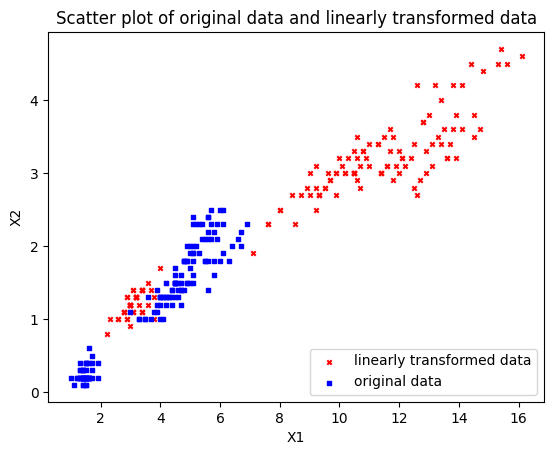

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(linearly_transformed_data[0,:], linearly_transformed_data[1,:], s=10, c='r', marker='x', label='linearly transformed data')
ax.scatter(D[:,0], D[:,1], s=10, c='b', marker='s', label='original data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='lower right')
plt.title('Scatter plot of original data and linearly transformed data')

In [66]:
Sigma = np.cov(D.T, ddof=1)

In [67]:
Sigma

array([[3.11627785, 1.2956094 ],
       [1.2956094 , 0.58100626]])

In [68]:
n = D.shape[0]
1/(n-1)*np.dot(centered_data.T, centered_data)

array([[3.11627785, 1.2956094 ],
       [1.2956094 , 0.58100626]])

In [69]:
import numpy.linalg as LA
evalues, evectors = LA.eig(Sigma)

In [112]:
print(evectors)

[[ 0.92177769 -0.38771882]
 [ 0.38771882  0.92177769]]


In [113]:
print(evalues)

[3.66123805 0.03604607]


In [114]:
np.diag(Sigma)

array([3.11627785, 0.58100626])

In [115]:
total_var = sum(np.diag(Sigma))

In [116]:
total_var

3.697284116331096

In [117]:
sum(evalues)

3.6972841163310957

In [135]:
evalues[0]/(evalues[0]+evalues[1])

0.9902506624845562

In [136]:
coordinates_of_data_along_evec1 = evectors[:,0].T.dot(centered_data.T)

In [142]:
print(coordinates_of_data_along_evec1)

[-2.56101214e+00 -2.56101214e+00 -2.65318991e+00 -2.46883437e+00
 -2.56101214e+00 -2.20693507e+00 -2.52224026e+00 -2.46883437e+00
 -2.56101214e+00 -2.50760626e+00 -2.46883437e+00 -2.37665660e+00
 -2.59978402e+00 -2.87631733e+00 -2.74536768e+00 -2.39129061e+00
 -2.57564615e+00 -2.52224026e+00 -2.24570695e+00 -2.43006249e+00
 -2.28447883e+00 -2.39129061e+00 -2.92972322e+00 -2.16816319e+00
 -2.10012330e+00 -2.37665660e+00 -2.29911284e+00 -2.46883437e+00
 -2.56101214e+00 -2.37665660e+00 -2.37665660e+00 -2.39129061e+00
 -2.50760626e+00 -2.56101214e+00 -2.46883437e+00 -2.74536768e+00
 -2.65318991e+00 -2.59978402e+00 -2.65318991e+00 -2.46883437e+00
 -2.61441803e+00 -2.61441803e+00 -2.65318991e+00 -2.22156908e+00
 -2.02257953e+00 -2.52224026e+00 -2.37665660e+00 -2.56101214e+00
 -2.46883437e+00 -2.56101214e+00  9.46116830e-01  8.00533174e-01
  1.16924425e+00  2.62100563e-01  8.92710943e-01  7.22989409e-01
  1.02366059e+00 -4.99459469e-01  8.15167179e-01  2.08694676e-01
 -3.15103930e-01  5.23999

In [143]:
evectors

array([[ 0.92177769, -0.38771882],
       [ 0.38771882,  0.92177769]])

In [144]:
coordinates_of_data_along_evec1[0]*evectors[:,0]

array([-2.36068386, -0.99295261])

In [145]:
centered_data[0,:]

array([-2.358     , -0.99933333])

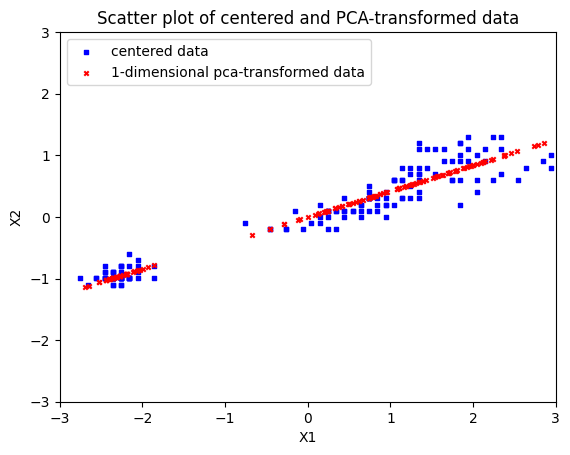

In [146]:
projected_data_on_evec1 = np.zeros((n,2))
for i in range(len(coordinates_of_data_along_evec1)):
    projected_data_on_evec1[i,:] = coordinates_of_data_along_evec1[i]*evectors[:,0]

pjdev1 = projected_data_on_evec1
# plot of centered data and its projection onto the first principial component (evec corresponding to largest eval)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(centered_data[:,0], centered_data[:,1], s=10, c='b', marker='s', label='centered data')
ax.scatter(pjdev1[:,0], pjdev1[:,1], s=10, c='r', marker='x', label='1-dimensional pca-transformed data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='upper left')
plt.title('Scatter plot of centered and PCA-transformed data')
plt.savefig('centered_and_pca_transformed_data.png')

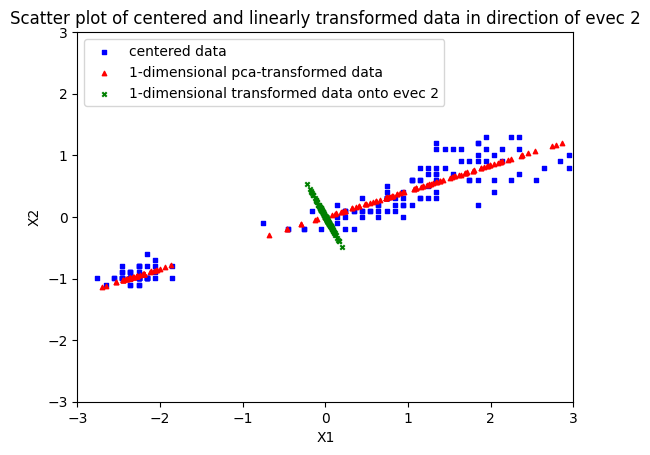

In [147]:
coordinates_of_data_along_evec2= evectors[:,1].T.dot(centered_data.T) 

projected_data_on_evec2 = np.zeros((n,2))
for i in range(len(coordinates_of_data_along_evec2)):
    projected_data_on_evec2[i,:] = coordinates_of_data_along_evec2[i]*evectors[:,1]

pjdev2 = projected_data_on_evec2
# plot of centered data and its projection onto (a) first PC and (b) second PC
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(centered_data[:,0], centered_data[:,1], s=10, c='b', marker='s', label='centered data')
ax.scatter(pjdev1[:,0], pjdev1[:,1], s=10, c='r', marker='^', label='1-dimensional pca-transformed data')
ax.scatter(pjdev2[:,0], pjdev2[:,1], s=10, c='g', marker='x', label='1-dimensional transformed data onto evec 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='upper left')
plt.title('Scatter plot of centered and linearly transformed data in direction of evec 2')
plt.savefig('centered_and_pca_transformed_data_evec2.png')

Text(0.5, 1.0, 'Scatter plot of data matrix D')

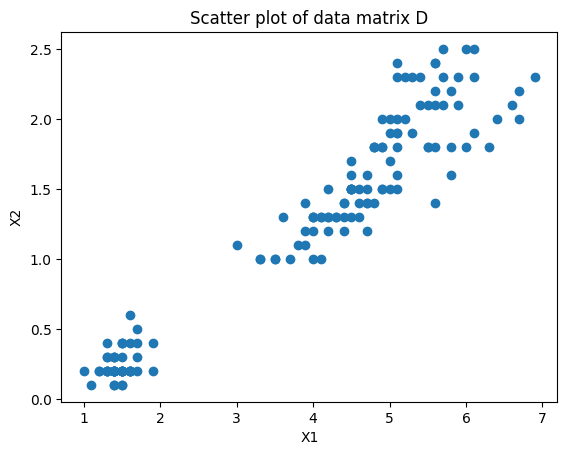

In [148]:
import matplotlib.pyplot as plt
plt.scatter(D[:,0], D[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of data matrix D')

Text(0.5, 1.0, 'scatter plot of transformed data with eigenvectors as axes')

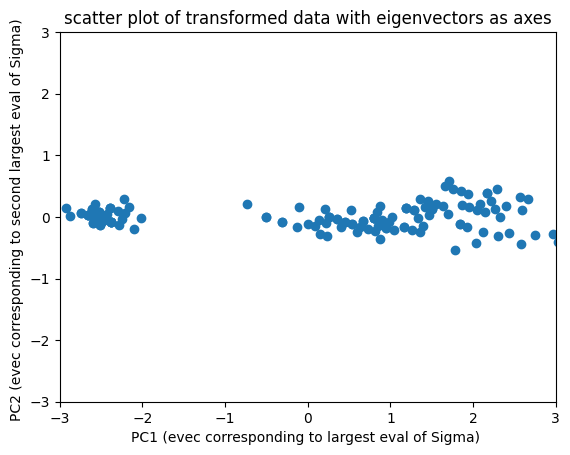

In [149]:
coordinates_of_data_in_evec_axes = evectors.T.dot(centered_data.T)
plt.scatter(coordinates_of_data_in_evec_axes[0,:], coordinates_of_data_in_evec_axes[1,:])
plt.xlabel('PC1 (evec corresponding to largest eval of Sigma) ')
plt.ylabel('PC2 (evec corresponding to second largest eval of Sigma) ')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('scatter plot of transformed data with eigenvectors as axes')

In [150]:
coordinates_of_data_in_evec_axes.shape

(2, 150)

In [151]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed_D = pca.fit_transform(D)

In [152]:
pca.explained_variance_ratio_

array([0.99025066, 0.00974934])

In [153]:
pca.explained_variance_

array([3.66123805, 0.03604607])

In [154]:
evalues

array([3.66123805, 0.03604607])

In [157]:
evalues[0]/(evalues[0]+evalues[1])

0.9902506624845562

In [158]:
evalues[1]/(evalues[0]+evalues[1])

0.009749337515443844

In [159]:
pca.components_ #listed row-wise, in order of decreasing evalue magnitude

array([[ 0.92177769,  0.38771882],
       [-0.38771882,  0.92177769]])

In [160]:
evectors

array([[ 0.92177769, -0.38771882],
       [ 0.38771882,  0.92177769]])

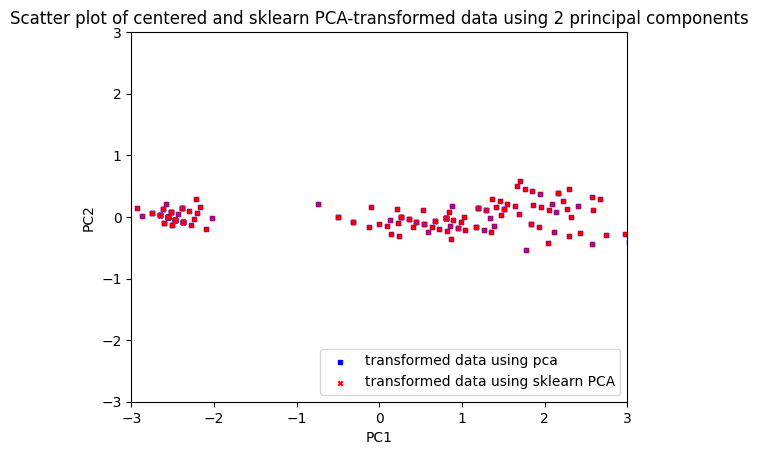

In [161]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(coordinates_of_data_in_evec_axes[0,:], coordinates_of_data_in_evec_axes[1,:], s=10, c='b', marker='s', label='transformed data using pca')
ax.scatter(pca_transformed_D[:,0], pca_transformed_D[:,1], s=10, c='r', marker='x', label='transformed data using sklearn PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='lower right')
plt.title('Scatter plot of centered and sklearn PCA-transformed data using 2 principal components')
plt.savefig('centered_and_pca_transformed_data_2components.png')

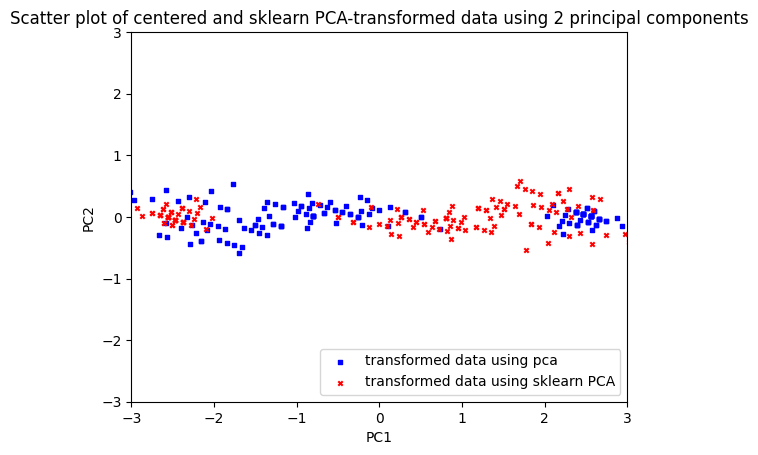

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(-1*coordinates_of_data_in_evec_axes[0,:], -1*coordinates_of_data_in_evec_axes[1,:], s=10, c='b', marker='s', label='transformed data using pca')
ax.scatter(pca_transformed_D[:,0], pca_transformed_D[:,1], s=10, c='r', marker='x', label='transformed data using sklearn PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='lower right')
plt.title('Scatter plot of centered and sklearn PCA-transformed data using 2 principal components')
plt.savefig('centered_and_pca_transformed_data_2components.png')

In [163]:
np.cov(coordinates_of_data_in_evec_axes,ddof=1)

array([[ 3.66123805e+00, -2.95065985e-16],
       [-2.95065985e-16,  3.60460707e-02]])

In [164]:
np.cov(pca_transformed_D.T,ddof=1)

array([[3.66123805e+00, 5.96092899e-18],
       [5.96092899e-18, 3.60460707e-02]])

In [105]:
D_iris = load_iris()['data']
pca = PCA(n_components=3)
pca_transformed_D_iris = pca.fit_transform(D_iris)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

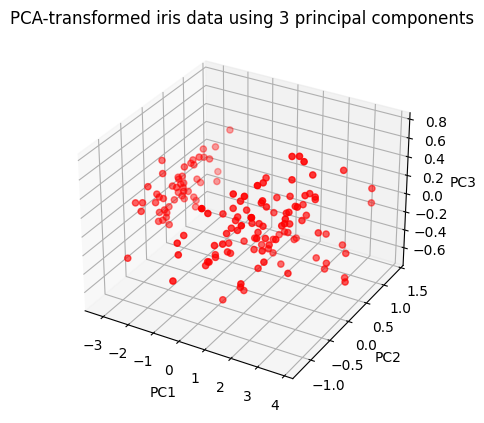

In [106]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pca_transformed_D_iris[:,0], pca_transformed_D_iris[:,1], pca_transformed_D_iris[:,2], c='r');
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA-transformed iris data using 3 principal components')
plt.savefig('pca-3d-transformed-iris-data.png')

In [107]:
D_iris.shape

(150, 4)

In [108]:
pca_transformed_D_iris

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

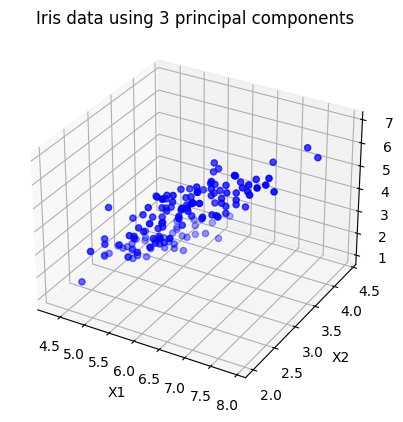

In [111]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(D_iris[:,0], D_iris[:,1], D_iris[:,2], c='b');
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Iris data using 3 principal components')
plt.savefig('iris-data-3d.png')